In [1]:
import pandas as pd

In [2]:
titanic_data = pd.read_csv('E:/datascience/EDA/titanic/train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import seaborn as sns

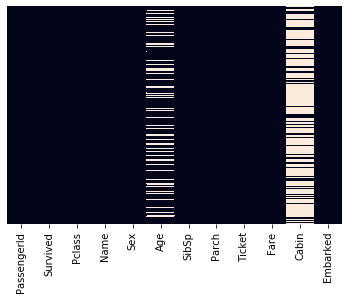

In [5]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar = False)

In [6]:
titanic_data["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

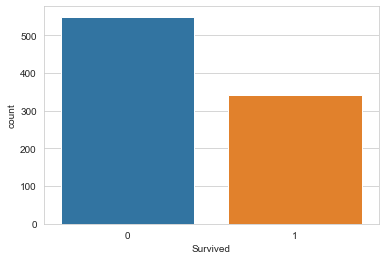

In [7]:
sns.set_style('whitegrid')
sns.countplot('Survived', data=titanic_data)

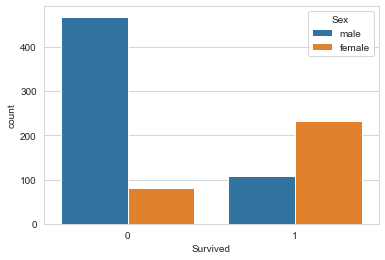

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

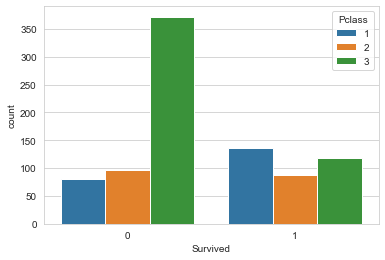

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

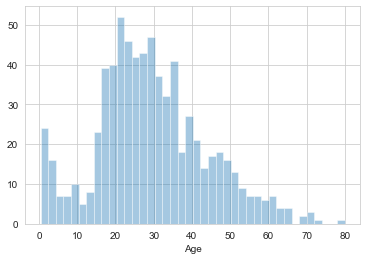

In [10]:
sns.distplot(titanic_data['Age'].dropna(), kde=False, bins=40)

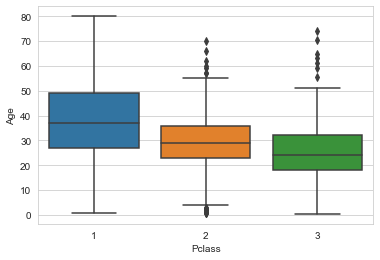

In [11]:
sns.boxplot(x='Pclass', y='Age', data=titanic_data)

In [12]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if(pclass ==1) :
            return 37
        if(pclass == 2):
            return 29
        if (pclass == 3):
            return 24;
    else:
        return age

In [13]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(impute_age, axis=1)

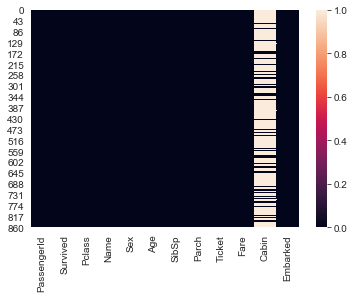

In [14]:
sns.heatmap(titanic_data.isnull())

In [15]:
titanic_data = titanic_data.drop('Cabin', axis=1)

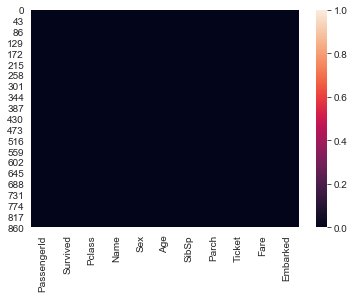

In [16]:
sns.heatmap(titanic_data.isnull())

In [17]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


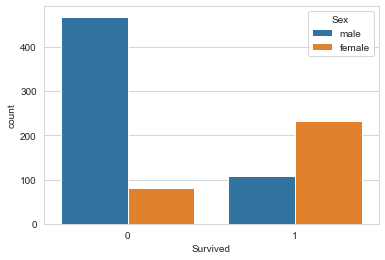

In [18]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

In [19]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
sex = pd.Categorical(titanic_data["Sex"])
sex

[male, female, female, female, male, ..., male, female, female, male, male]
Length: 891
Categories (2, object): [female, male]

In [21]:
sex = sex.rename_categories({'male': 1, 'female':0})
sex

[1, 0, 0, 0, 1, ..., 1, 0, 0, 1, 1]
Length: 891
Categories (2, int64): [0, 1]

In [22]:
titanic_data['Sex'] = sex

In [23]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [24]:
titanic_data = titanic_data.drop(['Name'], axis=1)

In [25]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,0,35.0,1,0,113803,53.1000,S
4,5,0,3,1,35.0,0,0,373450,8.0500,S


In [26]:
titanic_data = titanic_data.drop(["Ticket", "Fare"], axis = 1)

In [27]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,S
1,2,1,1,0,38.0,1,0,C
2,3,1,3,0,26.0,0,0,S
3,4,1,1,0,35.0,1,0,S
4,5,0,3,1,35.0,0,0,S


In [28]:
titanic_data = titanic_data.drop(["PassengerId", "Embarked"], axis=1)

In [29]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [30]:
titanic_data["Age"] = titanic_data["Age"].astype(int)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [32]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22,1,0
1,1,1,0,38,1,0
2,1,3,0,26,0,0
3,1,1,0,35,1,0
4,0,3,1,35,0,0


In [33]:
X = titanic_data.drop('Survived', axis=1)
Y = titanic_data['Survived']

In [34]:
X

,Pclass,Sex,Age,SibSp,Parch
0,3,1,22,1,0
1,1,0,38,1,0
2,3,0,26,0,0
3,1,0,35,1,0
4,3,1,35,0,0
...,...,...,...,...,...
886,2,1,27,0,0
887,1,0,19,0,0
888,3,0,24,1,2
889,1,1,26,0,0


In [35]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [37]:
x_train

,Pclass,Sex,Age,SibSp,Parch
682,3,1,20,0,0
799,3,0,30,1,1
273,1,1,37,0,1
715,3,1,19,0,0
57,3,1,28,0,0
...,...,...,...,...,...
135,2,1,23,0,0
228,2,1,18,0,0
488,3,1,30,0,0
832,3,1,24,0,0


In [38]:
x_test.shape

(268, 5)

In [39]:
lg = LogisticRegression()

In [40]:
y_train

682    0
799    0
273    0
715    0
57     0
      ..
135    0
228    0
488    0
832    0
38     0
Name: Survived, Length: 623, dtype: int64

In [42]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22,1,0
1,1,1,0,38,1,0
2,1,3,0,26,0,0
3,1,1,0,35,1,0
4,0,3,1,35,0,0


In [43]:
lg.fit(x_train, y_train)

C:\Users\Biswajit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_predict = lg.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [50]:
accuracy = accuracy_score(y_test, y_predict)

In [51]:
accuracy

0.7798507462686567

In [53]:
true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_test, y_predict).ravel()
true_positive, false_positive, false_negative, true_negative

(145, 19, 40, 64)

In [55]:
# this is the same as accuracy_score
(true_negative + true_positive)/(true_negative+ false_positive+ false_negative+ true_positive) 

0.7798507462686567

In [61]:
#Recall : from total number of positive results, how many are predicted correctly
total_positive_res = true_positive + false_negative
predicted_positive = true_positive

# calculating recall
recall = predicted_positive /total_positive_res
recall

0.6153846153846154

In [62]:
#precision: a measure of actual positive amongst total positive predicted
actual_positive = true_positive
total_positive_predicted = true_positive + false_positive
precision = true_positive / total_positive_predicted
precision

0.7710843373493976

In [64]:
#F1_score
f1_score = (2*precision*recall)/(precision+recall)
f1_score

0.6844919786096257

In [66]:
from sklearn.metrics import classification_report as cr

In [68]:
print(cr(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       164
           1       0.77      0.62      0.68       104

    accuracy                           0.78       268
   macro avg       0.78      0.75      0.76       268
weighted avg       0.78      0.78      0.77       268



In [70]:
from sklearn.metrics import roc_auc_score, roc_curve

In [72]:
auc = roc_auc_score(y_test, y_predict)
auc

0.7497654784240151

In [81]:
fpr,tpr,  _ = roc_curve(y_test, y_predict)

In [82]:
from matplotlib import pyplot as plt

No handles with labels found to put in legend.


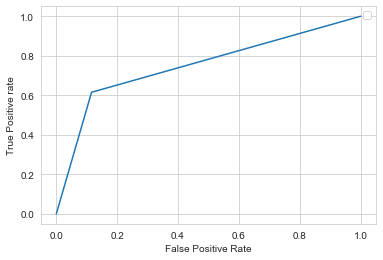

In [83]:
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend()
plt.show()